<a href="https://colab.research.google.com/github/SeongilHeo/hufs_ai_camp/blob/master/Day1_1_dnn_sine_regression_gradienttape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 싸인 함수 회귀분석 (Sine Regression)

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) 

2.3.0


## 데이터 생성

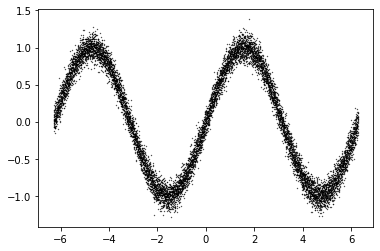

In [ ]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의

In [ ]:
class Model(tf.Module):
    def __init__(self):
        # create variables
        initializer = tf.initializers.GlorotUniform()
        W0 = tf.Variable(initializer(shape=[1, 20]), dtype=tf.float32, name='W0')
        W1 = tf.Variable(initializer(shape=[20, 20]), dtype=tf.float32, name='W1')
        W2 = tf.Variable(initializer(shape=[20, 1]), dtype=tf.float32, name='W2')

        b0 = tf.Variable(tf.zeros(shape=[20]), dtype=tf.float32, name='b0')
        b1 = tf.Variable(tf.zeros(shape=[20]),dtype=tf.float32, name='b1')
        b2 = tf.Variable(tf.zeros(shape=[1]), dtype=tf.float32, name='b2')

        self.weights = [W0, W1, W2]
        self.biases = [b0, b1, b2]
        self.activations = [tf.nn.relu, tf.nn.relu, None]
    
    def __call__(self, x):
        layer = x
        for W, b, activation in zip(self.weights, self.biases, self.activations):
            layer = tf.matmul(layer, W) + b
            if activation is not None:
                layer = activation(layer)
        output_pred = layer
    
        return output_pred

## 모델 훈련

In [ ]:
model = Model()
optimizer = tf.optimizers.Adam() # create optimizer

# run training
batch_size = 32
for training_step in range(10000):
    # get a random subset of the training data
    indices = np.random.randint(low=0, high=len(inputs), size=batch_size)
    input_batch = tf.Variable(inputs[indices], dtype=tf.float32, name='input')
    output_batch = tf.Variable(outputs[indices], dtype=tf.float32, name='output')
    
    with tf.GradientTape() as tape:
        output_pred = model(input_batch)
        mse = tf.reduce_mean(tf.square(output_pred - output_batch))

        grads  = tape.gradient(mse, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
    if training_step % 1000 == 0:
        print('{0:04d} mse: {1:.3f}'.format(training_step, mse))

0000 mse: 0.834
1000 mse: 0.166
2000 mse: 0.095
3000 mse: 0.071
4000 mse: 0.077
5000 mse: 0.024
6000 mse: 0.012
7000 mse: 0.011
8000 mse: 0.016
9000 mse: 0.011


## 테스트

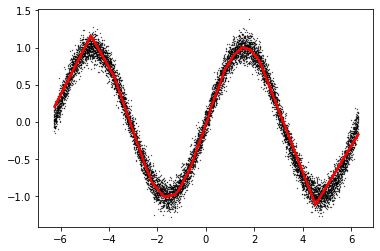

In [ ]:
test_input = tf.Variable(inputs, dtype=tf.float32, name='input')
test_output = tf.Variable(outputs, dtype=tf.float32, name='output')
test_output_pred = model(test_input)

plt.scatter(inputs[:, 0], test_output[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)